# Can I predict which features will be used before training the model?

This would enable large scale feature augmentation, like polynomial features, divisions, differences, going ham with features. One could conceive a *see what sticks* approach.

In [15]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import json
import gc
from sklearn.model_selection import KFold

import os
os.chdir('../src')
%load_ext autoreload
%autoreload 1

%aimport features.simple_features, features.utils, models.lightgbm_model
import models.lightgbm_model as lgb_model
from features import simple_features, utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
boosters = lgb_model.load_models_cv('simple_features_baseline')

In [23]:
feature_importances = lgb_model.get_feature_importances_cv(boosters).fold_0_gain
with open('../data/processed/train_headers.json') as f:
    feature_names = json.load(f)
feature_importances.index = feature_names
feature_rank = feature_importances.sort_values(ascending=False)

for k in feature_rank.keys():
    print("{}: {}".format(k, feature_rank[k]))

EXT_SOURCE_3: 137299.65363621712
EXT_SOURCE_2: 129118.09202861786
EXT_SOURCE_1: 41805.34209537506
PAYMENT_RATE: 31699.50828552246
DAYS_EMPLOYED: 18759.858472824097
DAYS_BIRTH: 14789.728620052338
AMT_ANNUITY: 13009.159098863602
INSTAL_DPD_MEAN: 12492.120272636414
INSTAL_AMT_PAYMENT_SUM: 11117.016325473785
CODE_GENDER: 9919.110132694244
CC_CNT_DRAWINGS_ATM_CURRENT_MEAN: 9668.840237140656
OWN_CAR_AGE: 8519.10424733162
PREV_CNT_PAYMENT_MEAN: 8081.249237060547
APPROVED_CNT_PAYMENT_MEAN: 7915.604811906815
NAME_EDUCATION_TYPE_Higher education: 7869.445578575134
ACTIVE_DAYS_CREDIT_MAX: 7721.551024675369
AMT_GOODS_PRICE: 7200.988894701004
AMT_CREDIT: 6701.678792715073
INSTAL_PAYMENT_PERC_MEAN: 6264.201903343201
ANNUITY_INCOME_PERC: 5873.230752944946
POS_MONTHS_BALANCE_SIZE: 5854.425956726074
BURO_AMT_CREDIT_SUM_DEBT_MEAN: 5619.04246711731
BURO_AMT_CREDIT_MAX_OVERDUE_MEAN: 5433.476400852203
PREV_NAME_CONTRACT_STATUS_Refused_MEAN: 5352.270094156265
DAYS_ID_PUBLISH: 5333.292610645294
BURO_DAYS_CRE

In [14]:
feat = pd.read_hdf("../data/processed/features.h5")
selected_features = list(feature_importances[feature_importances > 50].keys())
selected_features.append('TARGET')
feat[selected_features].to_hdf('../data/processed/selected_features.h5', key='selected_features')

In [25]:
feat = pd.read_hdf("../data/processed/features.h5")

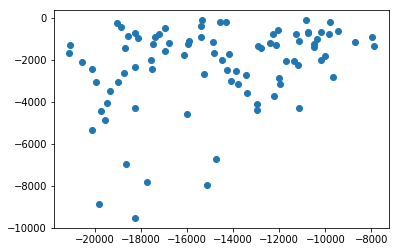

In [36]:
plt.scatter(feat[:100].DAYS_BIRTH, feat[:100].DAYS_EMPLOYED)

In [41]:
((feat.DAYS_EMPLOYED - feat.DAYS_BIRTH) / 365).describe()

count    291603.000000
mean         33.880422
std           9.782753
min          17.928767
25%          25.810959
50%          32.706849
75%          40.876712
max          68.210959
dtype: float64